<p style="text-align:left;">
    M1 Biostatistic
    <span style="float:right;">
        May 2020
    </span>
</p>
Authors: Lefort Tanguy, Coiffier Ophélie and Gaizi Ibrahim

*********************

# <center>Chaoseverywhere package </center>

<img src="https://raw.githubusercontent.com/tanglef/chaoseverywhere/b8f51140d20ca6eb8866e551e0c38c40b31aaa76/doc/_static/logo1_f.svg" alt="Logo" width="300" height="100">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Generalities-" data-toc-modified-id="1.-Generalities--1">1. Generalities <a name="gen"></a></a></span><ul class="toc-item"><li><span><a href="#A.-About-chaoseverywhere-" data-toc-modified-id="A.-About-chaoseverywhere--1.1">A. About chaoseverywhere <a name="about"></a></a></span></li><li><span><a href="#B.-Setup-for-the-report-" data-toc-modified-id="B.-Setup-for-the-report--1.2">B. Setup for the report <a name="setup"></a></a></span></li><li><span><a href="#C.-Define-the-concepts-" data-toc-modified-id="C.-Define-the-concepts--1.3">C. Define the concepts <a name="defs"></a></a></span></li></ul></li><li><span><a href="#2.-The-logistic-map-" data-toc-modified-id="2.-The-logistic-map--2">2. The logistic map <a name="logmap"></a></a></span><ul class="toc-item"><li><span><a href="#A.-Definition" data-toc-modified-id="A.-Definition-2.1">A. Definition</a></span></li></ul></li></ul></div>

## 1. Generalities <a name="gen"></a>
### A. About chaoseverywhere <a name="about"></a>

Chaoseverywhere is a Python$3$ package that includes two main themes: 
+ the Mandelbrot set,
+ the logistic map.

Using this package, we can observe the link between the Mandelbrot set and the bifurcation diagram of the logistic map.

In a first part, we will draw the logistic map and its bifurcation diagram. An animation and an interactive plot are available in order to watch the behavior of the logistic map its link to the chaos theory.

In a second part, we draw the Mandelbrot set and zoom in it. We also consider the coordinates of the points in the Mandelbrot set and their associated speed of divergence. Finally, we look at a way to construct a $3$D visualization of the data collected.

### B. Setup for the report <a name="setup"></a>
To create the figures below and manipulate them, we need to import some packages and configure them.

In [1]:
# to manipulate the paths
from mayavi import mlab
import sys
import os
# to manipulate the data generated
import numpy as np
# to display and use the interactiveness of IPython
from ipywidgets import interact, FloatSlider, fixed, IntSlider, HBox, VBox, ToggleButtons, Tab, Button, ColorPicker
import matplotlib.pyplot as plt
from matplotlib import rc
params = {'axes.labelsize': 12,
          'font.size': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': True,
          'figure.figsize': (7, 5),
          'animation.html': 'html5',
          'font.family': 'sans-serif'}
plt.rcParams.update(params)
%matplotlib notebook
# To display "interactive" mayavi plot embedded in the notebook
mlab.init_notebook()

Notebook initialized with ipy backend.


We also need to import our package `chaoseverywhere` too. It will allow us to use all the functions that we made to draw the plots, define the logistic map, use pre-made animations, $\dots$ 

In [2]:
sys.path.append(os.path.dirname(
    os.path.abspath('chaoseverywhere')) + (os.path.sep + '..'))
import chaoseverywhere as chaos

### C. Define the concepts <a name="defs"></a>
Our subject deals with both fractals and the chaos theory. Let's briefly define those two. Along this report, we will explain them more using animations.

Firstly, the chaos in mathematic is study of the patterns one can find in a system that seems totally random. Actually, a system is considered chaotic if: 
1. it's sensitive to the initial conditions: the slightest modification will have larger effect on the trajectory considered,
1. every point can be approached by periodic orbits,
1. any region of the phase space (meaning all the possible states) will intersect another region (it is called the [topological mixing](https://en.wikipedia.org/wiki/Mixing_(mathematics)#Topological_mixing )).

<div class="alert alert-block alert-info">
<b>Note:</b> Depending on the the characteristics observed and the system, these conditions may change. In this package, we mainly consider the first two.
</div>


Secondly, a fractal is an object that has at least one of the following characteristics:
1. a self-similarity at different scale,
1. self-similar structures can be observed within the figure,
1. the [Haussdorff dimension](https://en.wikipedia.org/wiki/Hausdorff_dimension) isn't an integer.

## 2. The logistic map <a name="logmap"></a>
### A. Definition

Let $r\in [0,4]$ be the growth ratio of the logistic map and $x_0\in [0,1]$ the starting point.
The logistic map is the non linear sequence: $x_{n+1}=rx_n(1-x_n)$.
We can also look at the associated function: $f(x)=rx(1-x)$.

Firstly, let's study an example with $r = 1.9$, $x_0 = 0.01$. In the package function, we set the parameter `iteration` to $100$. Indeed, `iteration` represents the number of iteration to draw the sequence and lets us see the asymptotic behavior of the sequence if big enough.
Before drawing the logistic sequence, lets take a look at the first iterate of the map:

In [3]:
fx = chaos.logistic(r=1.9, x=0.01)
print("f(0.01)=", fx, ".")

f(0.01)= 0.01881 .


In order to visualize the behavior, we can look at the cobweb plot. We draw the first bisector and keep track of the logistic map with the parameters defined above. Moreover, we can add the number of points that we want between $0$ and $1$ on the $x$-axis of the plot . Here, we choose to set it to `points = 100`.

<IPython.core.display.Javascript object>


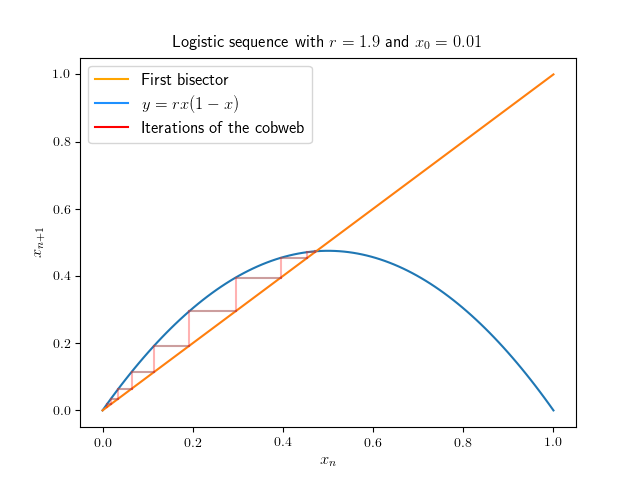

In [4]:
chaos.logistic_draw(0.01, 1.9, 100, 100)
fig = plt.gca()
plt.title(r'Logistic sequence with $r=1.9$ and $x_0=0.01$')
plt.xlabel(r'$x_n$')
plt.ylabel(r'$x_{n+1}$')
plt.plot([], [], color='orange', label='First bisector')
plt.plot([], [], color='dodgerblue', label='$y=rx(1-x)$')
plt.plot([], [], color='red', label='Iterations of the cobweb')
plt.legend()
plt.show()

So, starting at $0.01$ with a growth ration of $1.9$, we notice that the sequence tends to:
$$\lim_{n\rightarrow\infty}x_n\simeq 1.47.$$
Let's look at another example, changing the growth ratio but keeping the starting point. We use $r = 3.6$, $x_0 = 0.01$, and set `iteration` to $50$ and `points` to $100$.

<IPython.core.display.Javascript object>


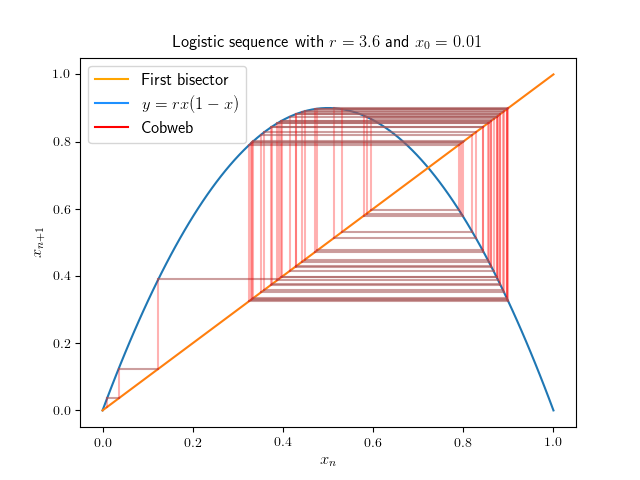

In [8]:
chaos.logistic_draw(0.01, 3.6, 50, 100)
fig = plt.gca()
plt.title(r'Logistic sequence with $r=3.6$ and $x_0=0.01$')
plt.xlabel(r'$x_n$')
plt.ylabel(r'$x_{n+1}$')
plt.plot([], [], color='orange', label='First bisector')
plt.plot([], [], color='dodgerblue', label='$y=rx(1-x)$')
plt.plot([], [], color='red', label='Cobweb')
plt.legend(loc='upper left')
plt.show()

We observe that the sequence doesn't tend to one point. So changing only the growth ratio has an impact on the convergence, but what about changing the starting point even both parameters ?

<IPython.core.display.Javascript object>


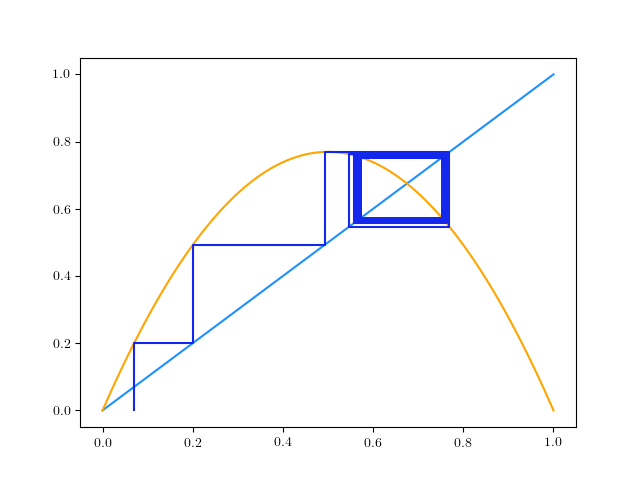

In [3]:
x0 = FloatSlider(min=0, max=1, step=.001, value=.01, continuous_update=False, description='x0')
r = FloatSlider(min=1, max=4, step=0.001,
                        continuous_update=False, value=3.57, description= 'r')
iterates = ToggleButtons(options=[10, 50, 100, 150, 200], description='Iterations:',)
coloring = ColorPicker(description='Cobweb color:',
    value='red',
)

tabparams = VBox(children=[x0, r, iterates])
tabstyle = VBox(children=[coloring])
tab = Tab(children=[tabparams, tabstyle])
tab.set_title(0, 'parameters')
tab.set_title(1, 'coloring the cobweb')
button = Button(
    description="Let's see the result!",
)

@button.on_click
def plot_on_click(b):
    plt.clf()
    chaos.plot_logi_interact(x0.value, r.value, iterates.value, linsdim=100, colors=coloring.value)
    
VBox(children=[tab, button])